# 第2章 機械学習の基本的な手順

データ収集 前処理 評価基準の設定 学習 結果の可視化

## 2.1 Wekaを用いた機械学習  
<br>
***  
#### 前処理  
<br>
次元の呪い  
> 特徴数の次元が増えるほど，情報が冗長となり，そのようなデータから得られたモデルの汎化能力が下がること

↓  
##### 主成分分析(PCA:Principal Component Analysis)  
手順
    1. 共分散行列の計算  
$ \displaystyle \sum = \frac{1}{N} \begin{pmatrix}
\sum_{x \ni D}(x_1-\bar{x}_1)^2 & \sum_{x \ni D}(x_1-\bar{x}_1)(x_2-\bar{x}_2) \\ 
\sum_{x \ni D}(x_1-\bar{x}_1)(x_2-\bar{x}_2) & \sum_{x \ni D}(x_2-\bar{x}_2)^2 \\ 
\end{pmatrix} $
    2. 共分散行列の固有値分解(固有値・固有ベクトルの導出) 
$ \sum ' = U^T\sum U = \begin{pmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{pmatrix} $
    3. lambda_1に対応する固有ベクトルからなる行列U_1で多次元データを低次元に写像
$ u_1 = U_1^T x $          寄与率 $= \frac{\lambda_1}{\lambda_1 + \lambda_2} $

<br>
特徴は各次元独立して計測されるため，その絶対値や分散が大きく異なる可能性がある  

そのままベクトル化してしまうと，絶対値の大きい特徴の影響が大きくなりすぎる  

↓  

一般的にはそれぞれの次元の平均値を0，標準偏差を1に揃える  

↓  

##### 標準化  

標準化後の値 = $ \frac{もと値 - 次元平均値}{次元標準偏差} $  

#### 評価基準の設定
- ホールドアウト法  
- Cross Validation法  
    m個の集合 に分割し，m-1個で学習を行い，残りの一つで評価を行う  
    m=データの個数の場合，一つ抜き法と呼ばれる
    

In [3]:
# scikit-learnを用いた機械学習
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [4]:
#データ読み込み
iris = load_iris()
print(iris.DESCR)
X = iris.data
Y = iris.target

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

(150, 2)
***標準化されたXデータの平均値と標準偏差***
[-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15] [1. 1. 1. 1.]


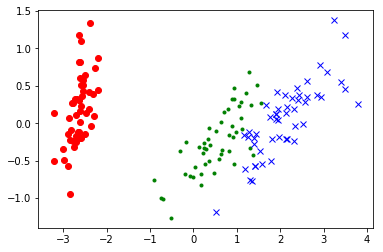

In [17]:
#前処理(クラスのまとまりを見る)
pca = PCA(n_components=2)
X2 = pca.fit_transform(X)
print(X2.shape)
#print(X2)
plt.plot(X2[Y==0,0], X2[Y==0,1],"ro") #X2の中からベクトルYの値が0に当たる行だけ取り出し，その0行目を抜き出す
plt.plot(X2[Y==1,0], X2[Y==1,1],"g.") 
plt.plot(X2[Y==2,0], X2[Y==2,1],"bx")

#前処理(もとのXを標準化して識別に使用できるデータにする)
X_scaled = preprocessing.scale(X)
print('***標準化されたXデータの平均値と標準偏差***')
print(X_scaled.mean(axis=0), X_scaled.std(axis=0))

In [27]:
# 評価基準の設定と学習

#1．学習次のパラメータを引数として識別器クラスのインスタンスを作成
#2．特徴ベクトルと教師ベクトルを引数として，Fitメソッドを実行
#3．識別したい特徴ベクトルを引数として，predictメソッドを実行

#K-NN法のインスタンスを作成
clf = KNeighborsClassifier(n_neighbors=1)
print(clf)
# CV法のパラメータを設定(インスタンス，学習データ，教師データ，交差数)
# 戻り値は交差数を要素数とするベクトル，各要素は正解率を表す
#scores = cross_val_score(clf, X_scaled, Y, cv=10)

# 単純な正解率はscoresの平均で求まる
# 交差の安定性を見るために95%信頼区間(+-標準偏差の2倍)
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

# 混同行列を求める場合
# cross_val_scoreではなく，cross_val_predictで識別器の出力を記録
# metricsパッケージのconfusion_metrixを用いる
y_pred = cross_val_predict(clf, X_scaled, Y, cv=10)
print('***混合行列***')
print(confusion_matrix(Y, y_pred))
# 精度/再現率/F値はこれらから計算できる
from sklearn.metrics import precision_recall_fscore_support
print('***レポート***')
precision_recall_fscore_support(Y, y_pred)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')
***混合行列***
[[50  0  0]
 [ 0 47  3]
 [ 0  4 46]]
***レポート***


(array([1.        , 0.92156863, 0.93877551]),
 array([1.  , 0.94, 0.92]),
 array([1.        , 0.93069307, 0.92929293]),
 array([50, 50, 50], dtype=int64))

# 第3章 識別 -概念学習-
- カテゴリデータから成る特徴ベクトルを入力として，それをクラス出力する識別器を作成する
- 概念学習
> 個々の事例から，あるクラスについて共通点を見つけること


